## **Background**

Section 35(2) of the Constitution Act, 1982, recognizes three groups of Aboriginal peoples: Indians (the correct name is First Nations), Inuit and Métis.

The *Indian Act*, enacted in 1876, excludes Inuit and Métis. "Indian Status" is a legal status granted by the Canadian government to certain members of First Nations who meet conditions decided by the federal government. The *Act* has had detrimental effects on First Nations. For example: the introduction of the residential school system (the last school closed in 1996); the creation of reserves; and historically, denying status to women, the restriction of First Nations leaving a reserve without a federal agent's permission, and the banning of speaking Indigenous languages, or participating in certain cultural and/or religious practices--there are many more. Although amended several times, the *Act* continues to legally restrict, define and confer status to First Nations in Canada.

In 2015, The Truth and Reconciliation Commission released its report on the legacy left by residential schools, and included 94 Calls to Action to further reconciliation between Canadians and Indigenous peoples. These seek to redress the health, cultural, social, economical, legal, and political consequences of the residential school system. Calls 13-17 concern language rights. Call 14(i) states: "Aboriginal languages are a fundamental and valued element of Canadian culture and society, and there is an urgency to preserve them." 

It is in this context, and in the spirit of reconciliation, that I have decided for my first webscraping project to learn about the Indigenous languages spoken in Canada.

## **Webscraping the Data from Wikipedia**

In [1]:
# load packages
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
# define site url
base_site = "https://en.wikipedia.org/wiki/Languages_of_Canada#Indigenous_languages"

In [3]:
# request and status confirmation
r = requests.get(base_site)
r.status_code

200

In [4]:
# get the HTML from the webpage
html = r.content

In [5]:
# convert the HTML to a BeatifulSoup object using lxml parser
soup = BeautifulSoup(html, 'lxml')

In [6]:
# view table tags
tables = soup.find_all("table")
#table

In [7]:
# pd.read all tables at base_site
tables = pd.read_html(base_site)

## **official languages list from tables[1]**

At the federal level, Canada's two official languages are English and French. At the provincial level, different provinces recognise English, French or both as official. Nunavut and the Northwest Territories have legislated certain Indigenous languages as official languages. 

Taking note of official status is important as it entitles citizens to receive services in them on request and to deal with the government in them.

The information in the last column of table[1] will be added to the indigenous_languages_df I create further below.

**Source of Wikipedia tables[1]:** Statistics Canada, 2011 Census Population by language spoken most often and regularly at home, age groups (total), for Canada, provinces and territories. (Figures reflect single responses.)


In [8]:
tables[1]

,Province/territory,Total population,English,%,French,%.1,Other languages,%.2,Official language(s)
0,Ontario,13312870,9255660,69.52%,568345,4.27%,3865780,29.04%,English[7]
1,Quebec,8066555,718985,8.91%,6377080,79.06%,1173345,14.54%,French[3]
2,British Columbia,4598415,3271425,71.14%,71705,1.56%,1360815,29.59%,English (de facto)
3,Alberta,4026650,3080875,76.51%,86705,2.15%,952785,23.66%,English
4,Manitoba,1261615,931410,73.83%,46055,3.65%,316120,25.06%,English
5,Saskatchewan,1083240,910865,84.09%,17735,1.64%,173475,16.01%,English
6,Nova Scotia,912300,838055,91.86%,33345,3.66%,49165,5.39%,English (de facto)
7,New Brunswick,736280,481690,65.42%,238865,32.44%,25165,3.42%,"English, French"
8,Newfoundland and Labrador,515680,501350,97.22%,3020,0.59%,13035,2.53%,English (de facto)
9,Prince Edward Island,141020,128975,91.46%,5395,3.83%,7670,5.44%,English (de facto)


In [9]:
tables[1]['Official language(s)'].unique()

array(['English[7]', 'French[3]', 'English (de facto)', 'English',
       'English, French',
       'Chipewyan, Cree, English, French, Gwich’in, Inuinnaqtun, Inuktitut, Inuvialuktun, North Slavey, South Slavey, Tłįchǫ[8]',
       'Inuit Language (Inuktitut, Inuinnaqtun), English, French[9]'],
      dtype=object)

## **indigenous_languages_df = tables[7]**

The raw data in **indigenous_languages_df** is two decades old. The survey to collect the data was done from September 2001 to January 2002. 

indigenous_languages_df has four columns(0 to 3), and 26 rows (0 to 25). Home language is defined as the language most spoken at home.

**Indigenous languages**  26 non-null     object

**No. of speakers**       26 non-null     object

**Mother tongue**        26 non-null     object

**Home language**        26 non-null     object

**Source of Wikipedia tables[7]:** Statistics Canada, 2006 Census Profile of Federal Electoral Districts (2003 Representation Order): Language, Mobility and Migration and Immigration and Citizenship Ottawa, 2007, pp. 2, 6, 10. 
"Aboriginal languages". Statistics Canada. Retrieved 2009-10-05.

'Aboriginal languages' was based on the survey conducted between September 2001 and January 2002: "Statistics Canada, in partnership with several Aboriginal organizations, conducted the 2001 Aboriginal Peoples Survey (APS) to collect information on the lifestyles and living conditions of Aboriginal people in Canada. The Aboriginal organizations included: the Congress of Aboriginal Peoples, Inuit Tapiriit Kanatami, Métis National Council, National Association Friendship Centres and Native Women’s Association of Canada and initially, the Assembly of First Nations..."

In [10]:
indigenous_languages_df = tables[7]

In [11]:
indigenous_languages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Indigenous languages  26 non-null     object
 1   No. of speakers       26 non-null     object
 2   Mother tongue         26 non-null     object
 3   Home language         26 non-null     object
dtypes: object(4)
memory usage: 960.0+ bytes


In [12]:
indigenous_languages_df

,Indigenous languages,No. of speakers,Mother tongue,Home language
0,Cree,99950,78855,47190
1,Inuktitut,35690,32010,25290
2,Ojibwe,32460,11115,11115
3,Montagnais-Naskapi (Innu),11815,10970,9720
4,Dene Suline,11130,9750,7490
5,Oji-Cree (Anishinini),12605,8480,8480
6,Mi'kmaq,8750,7365,3985
7,Siouan languages (Dakota/Sioux),6495,5585,3780
8,Atikamekw,5645,5245,4745
9,Blackfoot,4915,3085,3085


### **Cleaning the df**

Index 25 contains a footnote left over from Wikipedia. 

I change the two "Unknown" to NaN values, and then change the last three columns to numeric.

I also add a column stating whether a language has official recognition.

In [13]:
indigenous_languages_df.iloc[25]

Indigenous languages    Atgangmuurngniq
No. of speakers                  47[62]
Mother tongue                   Unknown
Home language                   Unknown
Name: 25, dtype: object

In [14]:
# remove wiki footnote
mask = indigenous_languages_df['No. of speakers'] == '47[62]'
column_name = 'No. of speakers'
indigenous_languages_df.loc[mask, column_name] = '47'

In [15]:
# "Unknown" to Nan, columns to numeric
indigenous_languages_df[['No. of speakers', 'Mother tongue', 'Home language']] = indigenous_languages_df[['No. of speakers', 'Mother tongue', 'Home language']].apply(pd.to_numeric, errors='coerce')
#df1 = indigenous_languages_df.apply(pd.to_numeric, errors='coerce')
print(indigenous_languages_df.dtypes)

Indigenous languages     object
No. of speakers           int64
Mother tongue           float64
Home language           float64
dtype: object


In [16]:
indigenous_languages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Indigenous languages  26 non-null     object 
 1   No. of speakers       26 non-null     int64  
 2   Mother tongue         25 non-null     float64
 3   Home language         25 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 960.0+ bytes


## **Indigenous language names**

Indigenous language can be known by several names or have several spellings. The names from the tables I scaped are therefore not all the same.

For example, North Slave and South Slave are also known as North Slavey and South Slavey.  Furthermore, while doing research, I saw that the Indigenous name for North Slave (Hare) is K’áshogot’ıne.

Lacking knowledge in the proper names to use, I have opted for prioritizing the names found in table[1] and collected in the indigenous_official list, because these come from data from the more recent 2011 census (as opposed to a survey from 2001-2002). I also use a "most information possible" approach. 

Here is a list of the names I update in indigenous_languages_df when these differ from names found in table[1]:

**indigenous_languages_df changes:**

Tłįchǫ or Dogrib = Tłįchǫ(Dogrib)

North Slave (Hare) = North Slavey (Hare)

South Slave = South Slavey

The more specific Kutchin-Gwich’in (Loucheaux)	remains as is, not being replaced by Gwich’in. Instead, I change the name in the indigenous_official list so the code works to make the "official_status" column. "Yes" means the language has official staus. "No" means the language does not have official status.

Inuvialuktun does not appear listed in indigenous_languages_df, but I left it on the list. I removed English and French, because my focus is on Indigenous languages.

In [17]:
mask1 = indigenous_languages_df['Indigenous languages'] == 'Tłįchǫ or Dogrib'
column_name = 'Indigenous languages'
indigenous_languages_df.loc[mask1, column_name] = 'Tłįchǫ (Dogrib)'

In [18]:
mask2 = indigenous_languages_df['Indigenous languages'] == 'North Slave (Hare)'
column_name = 'Indigenous languages'
indigenous_languages_df.loc[mask2, column_name] = 'North Slavey (Hare)'

In [19]:
mask3 = indigenous_languages_df['Indigenous languages'] == 'South Slave'
column_name = 'Indigenous languages'
indigenous_languages_df.loc[mask3, column_name] = 'South Slavey'

In [20]:
indigenous_official = ["Chipewyan", "Cree", "Kutchin-Gwich’in (Loucheaux)", "Inuinnaqtun", "Inuktitut", "Inuvialuktun", "North Slavey (Hare)", "South Slavey", "Tłįchǫ (Dogrib)"]

# create new 'official_status' column
indigenous_languages_df["official_status"] = ["Yes" if x in indigenous_official else "No" for x in indigenous_languages_df["Indigenous languages"]]


## **Explore, Visualize, and Learn**

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

### Which five languages are the most spoken?

I create two subsets. The first contains the top five in terms of the most speakers; the other consists of the remaining languages. I then concatenate the two.

In [22]:
#the five most spoken
five_most_spoken = indigenous_languages_df.nlargest(5,'No. of speakers')
five_most_spoken


#others
new_row = pd.DataFrame(data = {
    'Indigenous languages' : ['Others'],
    'No. of speakers' : [indigenous_languages_df['No. of speakers'][5:].sum()]
})


#combining both subsets
df2 = pd.concat([five_most_spoken, new_row])

**The five most spoken are:** Cree, Inuktitut, Ojibwe, Oji-Cree (Anishinini), and Montagnais-Naskapi (Innu).


In [23]:
#the five most spoken
five_most_spoken[["Indigenous languages", "No. of speakers"]]

,Indigenous languages,No. of speakers
0,Cree,99950
1,Inuktitut,35690
2,Ojibwe,32460
5,Oji-Cree (Anishinini),12605
3,Montagnais-Naskapi (Innu),11815


Here I use a pie chart to visualize the proportions.

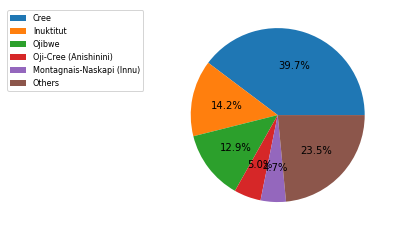

In [24]:
# visualize in pie chart
plt.pie(df2['No. of speakers'], autopct='%1.1f%%')
plt.legend(labels = df2['Indigenous languages'], loc='upper right', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)
plt.show()

### **Which are the ten most endangered languages?**

**The ten most endangered are:** Atgangmuurngniq, Tlingit, Kutchin-Gwich’in (Loucheaux), Inuinnaqtun, Mohawk, Chipewyan, Malecite, Nisga'a, North Slavey (Hare), and Chilcotin.

In [25]:
#the ten most endangered
ten_most_endangered = indigenous_languages_df.nsmallest(10, 'No. of speakers')

ten_most_endangered[['Indigenous languages','No. of speakers', ]]

,Indigenous languages,No. of speakers
25,Atgangmuurngniq,47
24,Tlingit,175
20,Kutchin-Gwich’in (Loucheaux),570
19,Inuinnaqtun,580
21,Mohawk,615
18,Chipewyan,770
17,Malecite,790
23,Nisga'a,1090
15,North Slavey (Hare),1235
14,Chilcotin,1400


### **How many languages have official status?**

18 do not have official status

8 do have official status

In [26]:
official_status_counts = indigenous_languages_df['official_status'].value_counts()
official_status_counts

No     18
Yes     8
Name: official_status, dtype: int64

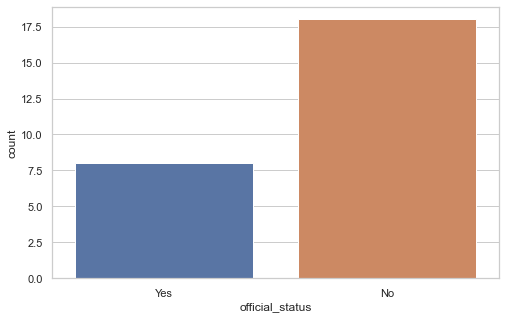

In [27]:
sns.set(style='whitegrid')
plt.figure(figsize=(8,5))
sns.countplot(x='official_status', data=indigenous_languages_df)
plt.show()


### **How many have a large proportion of speakers whose language is not their mother tongue?**

I define a "large proportion" as being more than 25% of speakers not originally learning a language as a mother tongue.



In [28]:
indigenous_languages_df["Non_mother-tongue_speakers_No"] = indigenous_languages_df["No. of speakers"] - indigenous_languages_df["Mother tongue"]
indigenous_languages_df["Non_mother-tongue_speakers_ratio"] = indigenous_languages_df["Non_mother-tongue_speakers_No"] / indigenous_languages_df["No. of speakers"]

In [29]:
large_second_lang = indigenous_languages_df[indigenous_languages_df["Non_mother-tongue_speakers_ratio"] > 0.25]

In [30]:
large_second_lang.sort_values("Non_mother-tongue_speakers_ratio", ascending=False)[["Indigenous languages", "No. of speakers", "Non_mother-tongue_speakers_No", "Non_mother-tongue_speakers_ratio"]]


,Indigenous languages,No. of speakers,Non_mother-tongue_speakers_No,Non_mother-tongue_speakers_ratio
24,Tlingit,175,175.0,1.000000
22,Shuswap,1650,1400.0,0.848485
23,Nisga'a,1090,840.0,0.770642
16,South Slavey,2315,1715.0,0.740821
2,Ojibwe,32460,21345.0,0.657579
21,Mohawk,615,325.0,0.528455
15,North Slavey (Hare),1235,585.0,0.473684
20,Kutchin-Gwich’in (Loucheaux),570,215.0,0.377193
12,Carrier,2495,935.0,0.374749
9,Blackfoot,4915,1830.0,0.372330


Tlingit has no mother-tongue speakers.

Shuswap, Nisga'a, South Slavey, Ojibwe and Mohawk have over 50% non mother-tongue speakers.

North Slavey (Hare), Kutchin-Gwich’in (Loucheaux), Carrier, Blackfoot, Inuinnaqtun, Oji-Cree (Anishinini), Malecite, Chipewyan, Algonquin, and Gitksan had proportions between 25% to 47.4%, in terms of non mother-tongue speakers.

## **Conclusion**

According to Statistics Canada, there are over 70 Indigenous languages spoken in Canada. Therefore the dataset used here lacks information on 44 languages. Statistics Canada also has more recent data from the 2016 census.

However, I chose this dataset because it provided some information on all speakers, mother tongue speakers, and home language. The survey from 2001-2002 is old, but could provide a baseline for future comparaison.

The five most spoken languages accounted for over 90% of the Indigenous speakers. This demonstrates the extent that Indigenous languages are under threat. Fifteen languages had more than 25% non mother-tongue speakers. Is this due to revitalization in Indigenous language learning, or to a decline in passing down mother-tongue languages? More analysis and comparaison with new data will be necessary to answer that question.

In the appendix, there is research I did on categorizing languages by language family. There are many references there, as I could not find one source with all the information required. I would like to come back to this project and be able to add data on family language groups to the dataframe.

I have lived in Canada for over 45 years, and it is humbling to see to what extent I do not know anything about Indigenous languages and cultures. This is a first step in a long journey to doing my part in reconciliation.

### **Project References**
Constitution Act, 1982 https://laws-lois.justice.gc.ca/eng/const/page-13.html#h-53

21 Things you may not know about the Indian Act https://www.cbc.ca/news/indigenous/21-things-you-may-not-know-about-the-indian-act-1.3533613

Truth and Reconciliation Commission of Canada: Calls to Action https://www.documentcloud.org/documents/2091412-trc-calls-to-action

https://en.wikipedia.org/wiki/Inuinnaqtun

https://www.thecanadianencyclopedia.ca/en/article/tlicho-dogrib#:~:text=Tlicho%20(T%C5%82%C4%B1%CC%A8ch%C7%AB)%2C%20also%20known,(or%20Athabascan)%20language%20family.

https://www.languagegeek.com/dene/kashogotine/north_slavey.html

https://www12.statcan.gc.ca/census-recensement/2016/as-sa/98-200-x/2016022/98-200-x2016022-eng.cfm

## **Appendix**

### **References for future work on Indigenous language families**

https://www12.statcan.gc.ca/census-recensement/2016/as-sa/98-200-x/2016022/98-200-x2016022-eng.cfm

https://www.thecanadianencyclopedia.ca/en/article/aboriginal-people-lang

https://en.wikipedia.org/wiki/Maliseet

https://en.wikipedia.org/wiki/Chipewyan


https://en.wikipedia.org/wiki/Inuinnaqtun


https://en.wikipedia.org/wiki/Tsimshian





# UPDATE: INDIGENOUS LANGUAGE FAMILIES

I used the references in the Appendix section above, to gather information on family languages. While researching, I discovered that Atgangmuurngniq is an Inuit Sign Language!

Below I update the dataframe with the addition of the 'language_family' column.

In [31]:
import pandas as pd
import numpy as np
import seaborn as sn
import requests
import bs4

In [32]:
Algonquian = ["Cree", "Ojibwe", "Montagnais-Naskapi (Innu)", "Oji-Cree (Anishinini)", "Mi'kmaq", "Atikamekw", "Blackfoot", "Algonquin", "Malecite"]
Inuit = ["Inuktitut", "Inuinnaqtun"]
Inuit_Sign_Language = ["Atgangmuurngniq"]
Athabaskan = ["Dene Suline", "Tłįchǫ (Dogrib)", "Carrier", "Chilcotin", "North Slavey (Hare)", "South Slavey", "Kutchin-Gwich’in (Loucheaux)", "Tlingit"]
Siouan = ["Siouan languages (Dakota/Sioux)"]
Salishan = ["Shuswap"]
Tsimshian = ["Gitksan", "Nisga'a"]
Iroquoian = ["Mohawk"]


def family(language):
    if language in Algonquian:
        return "Algonquian"
    elif language in Inuit:
        return "Inuit"
    elif language in Inuit_Sign_Language:
        return "Inuit_Sign_Language"
    elif language in Athabaskan:
        return "Athabaskan"
    elif language in Siouan:
        return "Siouan"
    elif language in Salishan:
        return "Salishan"
    elif language in Tsimshian:
        return "Tsimshian"
    else:
        return "Iroquoian"

indigenous_languages_df['language_family'] = indigenous_languages_df['Indigenous languages'].apply(lambda x: family(x))

In [33]:
indigenous_languages_df

,Indigenous languages,No. of speakers,Mother tongue,Home language,official_status,Non_mother-tongue_speakers_No,Non_mother-tongue_speakers_ratio,language_family
0,Cree,99950,78855.0,47190.0,Yes,21095.0,0.211056,Algonquian
1,Inuktitut,35690,32010.0,25290.0,Yes,3680.0,0.103110,Inuit
2,Ojibwe,32460,11115.0,11115.0,No,21345.0,0.657579,Algonquian
3,Montagnais-Naskapi (Innu),11815,10970.0,9720.0,No,845.0,0.071519,Algonquian
4,Dene Suline,11130,9750.0,7490.0,No,1380.0,0.123989,Athabaskan
5,Oji-Cree (Anishinini),12605,8480.0,8480.0,No,4125.0,0.327251,Algonquian
6,Mi'kmaq,8750,7365.0,3985.0,No,1385.0,0.158286,Algonquian
7,Siouan languages (Dakota/Sioux),6495,5585.0,3780.0,No,910.0,0.140108,Siouan
8,Atikamekw,5645,5245.0,4745.0,No,400.0,0.070859,Algonquian
9,Blackfoot,4915,3085.0,3085.0,No,1830.0,0.372330,Algonquian


Algonquian is by far the language family with the most speakers.

In [34]:
#groupby 'language_family'
data = indigenous_languages_df.groupby('language_family')['No. of speakers'].sum().sort_values(ascending=False)
data

language_family
Algonquian             179615
Inuit                   36270
Athabaskan              21965
Siouan                   6495
Tsimshian                2665
Salishan                 1650
Iroquoian                1385
Inuit_Sign_Language        47
Name: No. of speakers, dtype: int64

In [35]:
data_per = indigenous_languages_df.groupby('language_family').agg(percentage =('No. of speakers', lambda p: p.sum() / data.sum() * 100)).round(2)

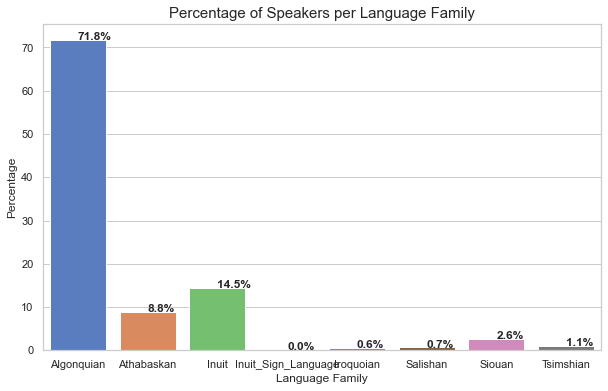

In [36]:
# Seaborn barplot
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=data_per.index, y='percentage', data=data_per, ci=None, palette="muted",orient='v')
ax.set_title("Percentage of Speakers per Language Family", fontsize=15)
ax.set_xlabel ("Language Family")
ax.set_ylabel ("Percentage")

# calculate the percentages and annotate the sns barplot
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height(),"%.1f%%"% rect.get_height(), weight='bold' )
    
#bar.savefig("Seaborn_Pie_Chart.png");

## WEBSCRAPING MAP 

In [37]:
res = requests.get("https://en.wikipedia.org/wiki/Inuit_Sign_Language")
#(excl._ASL_and_LSQ).png
#res = requests.get("https://en.wikipedia.org/wiki/Deep_Blue_(chess_computer)")

In [38]:
soup = bs4.BeautifulSoup(res.text,'lxml')

In [39]:
image_info = soup.select('.thumbimage')

In [40]:
image_info

[<img alt="" class="thumbimage" data-file-height="2185" data-file-width="2125" decoding="async" height="226" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/95/US_%26_Canada_sign-language_map_%28excl._ASL_and_LSQ%29.png/220px-US_%26_Canada_sign-language_map_%28excl._ASL_and_LSQ%29.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/9/95/US_%26_Canada_sign-language_map_%28excl._ASL_and_LSQ%29.png/330px-US_%26_Canada_sign-language_map_%28excl._ASL_and_LSQ%29.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/9/95/US_%26_Canada_sign-language_map_%28excl._ASL_and_LSQ%29.png/440px-US_%26_Canada_sign-language_map_%28excl._ASL_and_LSQ%29.png 2x" width="220"/>]

In [41]:
len(image_info)

1

In [42]:
map_isl = image_info[0]

In [43]:
type(map_isl)

bs4.element.Tag

In [44]:
map_isl['src']

'//upload.wikimedia.org/wikipedia/commons/thumb/9/95/US_%26_Canada_sign-language_map_%28excl._ASL_and_LSQ%29.png/220px-US_%26_Canada_sign-language_map_%28excl._ASL_and_LSQ%29.png'

In [45]:
image_link = requests.get('https://upload.wikimedia.org/wikipedia/commons/thumb/9/95/US_%26_Canada_sign-language_map_%28excl._ASL_and_LSQ%29.png/220px-US_%26_Canada_sign-language_map_%28excl._ASL_and_LSQ%29.png')

In [46]:
# The raw content (its a binary file, meaning we will need to use binary read/write methods for saving it)
# image_link.content

In [47]:
f = open('map_isl.png','wb')

In [48]:
f.write(image_link.content)

22471

In [49]:
f.close()

In [50]:
from IPython.display import Image

## Inuit Sign Language and Plains Sign Talk

The map below shows the confirmed range of Inuit Sign Language in Nunavut (in light blue) among various sign languages of the US and Canada. 

The burgundy is the confirmed range of Plains Sign Talk. It was once the lingua franca across what is now central Canada, the central and western United States and northern Mexico. It was used among the various Plains Nations, which belong to the Algonquian language family.

<img src="map_isl.png">

## ADDITIONAL REFERENCES FOR UPDATE

https://en.wikipedia.org/wiki/Inuit_Sign_Language

https://en.wikipedia.org/wiki/Plains_Indians